WRITE ME A SHORT INTRODUCTION TO A SIMULATION PROGRAM THAT DEMONSTRATES THE CAPACITY OF MY FRAMEWORK TO HELP IN DEVELOPING 6DOF ALGORITHMS

In [1]:
from scipy.integrate import solve_ivp 
import numpy as np


import sys, os, importlib
sys.path.append(os.path.join(os.getcwd(), os.pardir))

import C4dynamics as c4d
importlib.reload(c4d)

<module 'C4dynamics' from '/home/avraham/Projects/examples/../C4dynamics/__init__.py'>

import sys
print(sys.executable)

In [10]:
# input data 


# 
# parameters for initial example
##
Gn = 250 

s = 0.0127
d = 0.127
mach = 0.8

cD0 = 0.8
cLa = 39
cMa = -170 
cMd = 250
cMqcMadot = -13000

k = 0.0305

m = 57
xcm = 1.35
xref = 1.35

g = 9.8


ixx = 1
iyy = izz = 61

In [11]:
# initialization 
t = 0
ts = 1e-2


missile = c4d.rigidbody()
# s6d   = c4d.sixdof(stick)

target = c4d.datapoint(x = 4000, y = 1000, z = -3000
                        , vx = -250, vy = 0, vz = 0)

In [12]:
# update air conditions: 
#   atmosphere
#   mach number 
#   dynamic pressure

In [ ]:
# forces moments description for the simulation run
# the equations assume forces in body frame
# maybe for making things easier i should first make it work with datapoint in one dimension. 
# but maybe for the moment i should first make the rigid body sim work and then arrange it.
# הו מה יפים הלילות הקסומים
# עת פיה ונסיך וגם מלך רוקדים
# נסיכה וצפרדע, ארנב וגמד
# שרים עד אור בוקר, רוקדים יד ביד.
# but another maybe to move to a python file and complete it there be easier. 
#
# calc
## 


BI = c4d.dcm321(phi, theta, psi)
ucl = BI @ [[1], [0], [0]] # is it? 
ucl = np.array([[np.cos(theta) * np.cos(psi)]
        , [np.cos(theta) * np.sin(psi)] 
        , [np.sin(-theta)]])
vm = np.transpose(BI) @ [[u], [v], [w]]
vm_total = np.sqrt(vm[0]**2 + vm[0]**2 + vm[0]**2)

alpha = np.arctan2(w, u)
beta  = np.arctan2(-v, u)
uvm = vm / vm_total
alpha_total = 0# np.arccos(uvm @ ucl)

# 
# aerodynamic forces
##

# atmospheric properties up to 2000m
h = z
pressure = 101325 # pressure pascals
rho = 1.225       # density kg/m^3
vs = 340.29       # speed of sound m/s

mach = vm_total / vs 

# dynamic pressure
Q = 1 / 2 * rho * vm_total**2


# 
# guidance and control
## 
# d1, d2, d3, d4 = 0, 0, 0, 0
acmd_yb, acmd_zb = 0, 0
dpitch = -Gn * acmd_zb / Q
dyaw = -Gn * acmd_yb / Q




# lift and drag
cL = cLa * alpha_total
L = Q * s * cL 

cD = cD0 + k * cL**2
D = Q * s * cD

# in body frame
A = D * np.cos(alpha_total) - L * np.sin(alpha_total)
N = D * np.sin(alpha_total) + L * np.cos(alpha_total)

fAb = np.array([[-A]
                , [N * (-v / np.sqrt(v**2 + w**2))]
                , [N * (-w / np.sqrt(v**2 + w**2))]])

cNy = fAb[1] / Q / s
cNz = fAb[2] / Q / s

# 
# aerodynamic moments 
## 

cNb = cMa
cNd = cMd 
# cNr = cMq 
# cNbdot = cMadot 
cNrcNbdot = cMqcMadot
cMref = cMa * alpha + cMd * dpitch
cNref = cNb * beta  + cNd * dyaw


# wrt center of mass
cM = cMref - cNz * (xcm - xref) / d + d / (2 * v) * cMqcMadot * q
cN = cNref - cNy * (xcm - xref) / d + d / (2 * v) * cNrcNbdot * r

lA = 0              # aerodynamic moemnt in roll
mA = Q * cM * s * d # aerodynamic moment in pitch
nA = Q * cN * s * d # aerodynamic moment in yaw 


# 
# gravity
## 
fGe = [[0], [0], [missile.m * missile.g]]
fGb = BI @ fGe 
missile.fx = (fAb[0] + fGb[0]) / missile.m - (missile.q * missile.w - missile.r * missile.v)



In [ ]:
t = 0
u, v, w = 100, 1, 1

while t <= 60:
    
    x = obj.x, obj.y, obj.z, u, v, w, obj.phi, obj.theta, obj.psi, obj.p, obj.q, obj.r
    
    x = solve_ivp(c4d.rigidbody.eqm, [t, t + obj._dt], x, args = (obj, )).y[:, -1]
    
    obj.x, obj.y, obj.z, u, v, w, obj.phi, obj.theta, obj.psi, obj.p, obj.q, obj.r = x
    
    t += obj._dt
    obj.store(t)

In [5]:
# stick.run(0, 60)
c4d.run(missile, target)

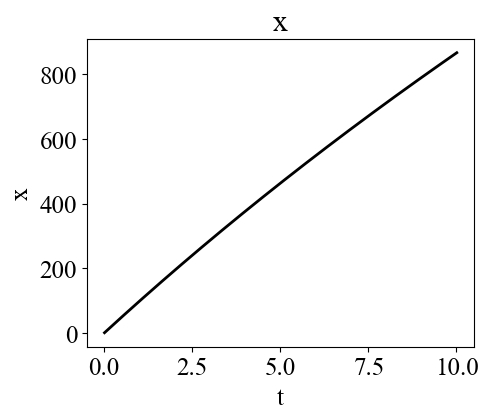

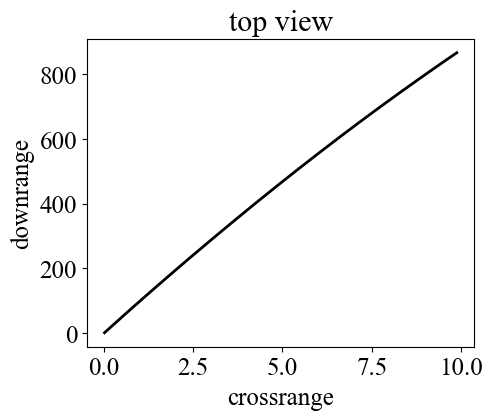

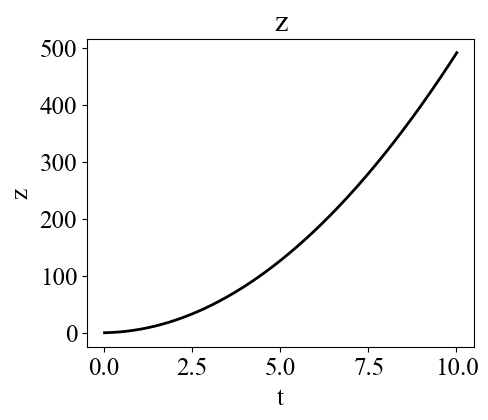

In [7]:
stick.draw('x')
stick.draw('top')
stick.draw('z')
c4d.draw(missile, taget, 'top')